In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

This notebook is dedicated to an Exploratory Data Analysis (EDA) project focusing on a house pricing dataset. The approach involves examining relationships between various factors individually, followed by an analysis of each factor's impact on price changes. The ultimate objective is to develop a recommendation model for estimating the price of a sample house.

Let's load the dataset:

In [2]:
data = pd.read_csv("../housing_price_dataset.csv")
df = pd.DataFrame(data=data)
df[:1]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618



*A slight adjustment is required in the column names. It's necessary to convert all column names to lowercase to prevent potential typos in the future.*

In [5]:
 df.columns = ["squarefeet", "bedrooms", "bathrooms", "neighborhood", "yearbuilt", "price"]
df[:2]

,squarefeet,bedrooms,bathrooms,neighborhood,yearbuilt,price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626


**Preparing Data**

Our dataset is well recorded, without outliers, duplicates, and NaN or null values.

Additionally, all columns have the appropriate data types. Everything appears to be in order.

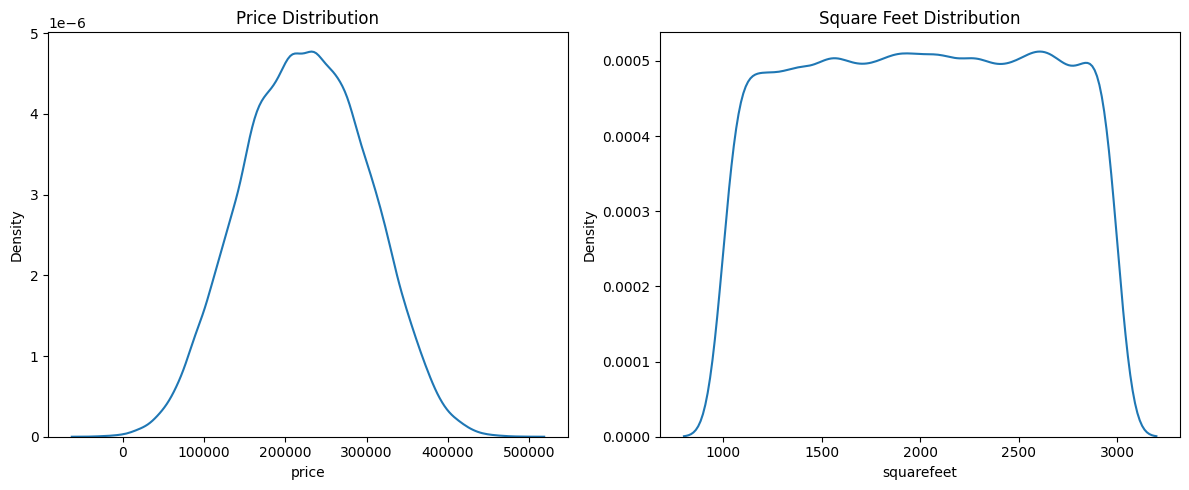

In [6]:

# Assuming df is your DataFrame

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the KDE for the "price" column on the first subplot
sns.kdeplot(data=df["price"], ax=axes[0])
axes[0].set_title("Price Distribution")

# Plot the KDE for the "squarefeet" column on the second subplot
sns.kdeplot(data=df["squarefeet"], ax=axes[1])
axes[1].set_title("Square Feet Distribution")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


There is no cluster data and no outlier, distribution of our data is Normal

## dispersion of data points


##### Looking at dispersion and possible relationships

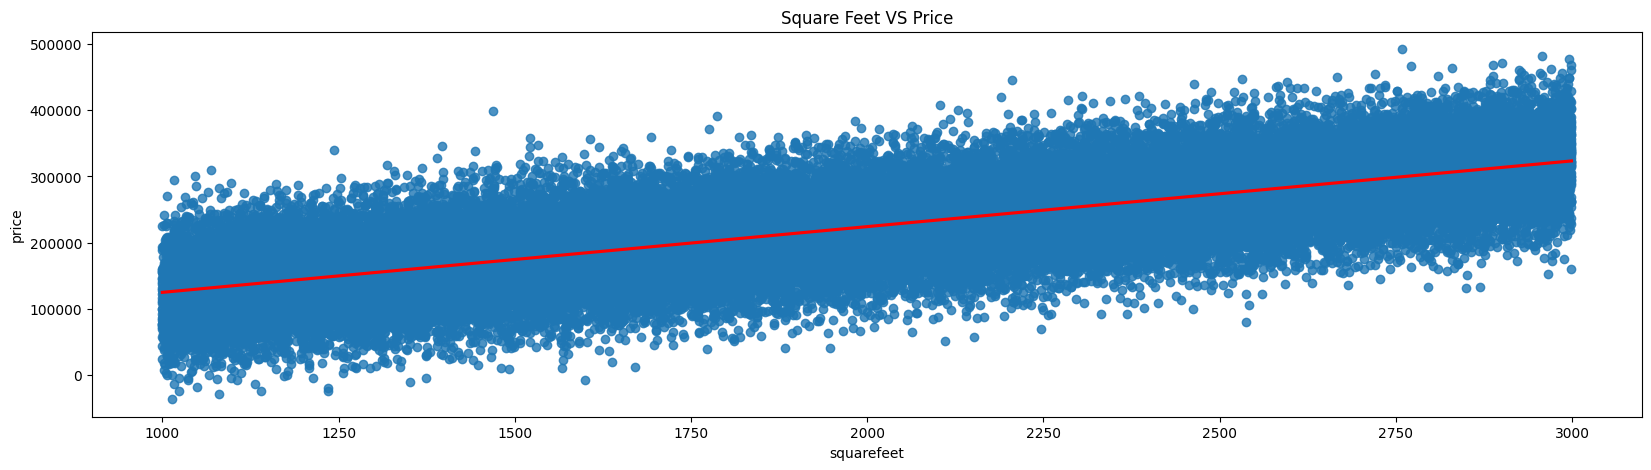

In [7]:
plt.figure(figsize=(20, 5))
sns.regplot(data=df, x="squarefeet", y="price",line_kws={"color": "red"})
plt.title("Square Feet VS Price")
plt.show()

The correlation between house square footage and price is significant, necessitating an examination of other influencing factors.




 lets look at number of bedrooms/bathrooms/ types of neighborhoods.

In [8]:
min_bed = df["bedrooms"].min()
max_bed = df["bedrooms"].max()
min_bath = df["bathrooms"].min()
max_bath = df["bathrooms"].max()

print(F"minimum number of bedrooms in dataset is {min_bed} and maximum number of bedrooms in dataset is {max_bed}\n",
F"the minimum number of bathrooms in dataset is {min_bath} and the maximum number of bathrooms is {max_bath}")

minimum number of bedrooms in dataset is 2 and maximum number of bedrooms in dataset is 5
 the minimum number of bathrooms in dataset is 1 and the maximum number of bathrooms is 3


In [9]:
df[:1]

,squarefeet,bedrooms,bathrooms,neighborhood,yearbuilt,price
0,2126,4,1,Rural,1969,215355.283618


While the diagram above illustrates a clear regression relationship between house price and square footage, it is imperative to explore potential hidden influences on this relationship. Factors such as the number of bathrooms, bedrooms, construction year, and neighborhood may introduce additional, unseen complexities that could impact the observed correlation

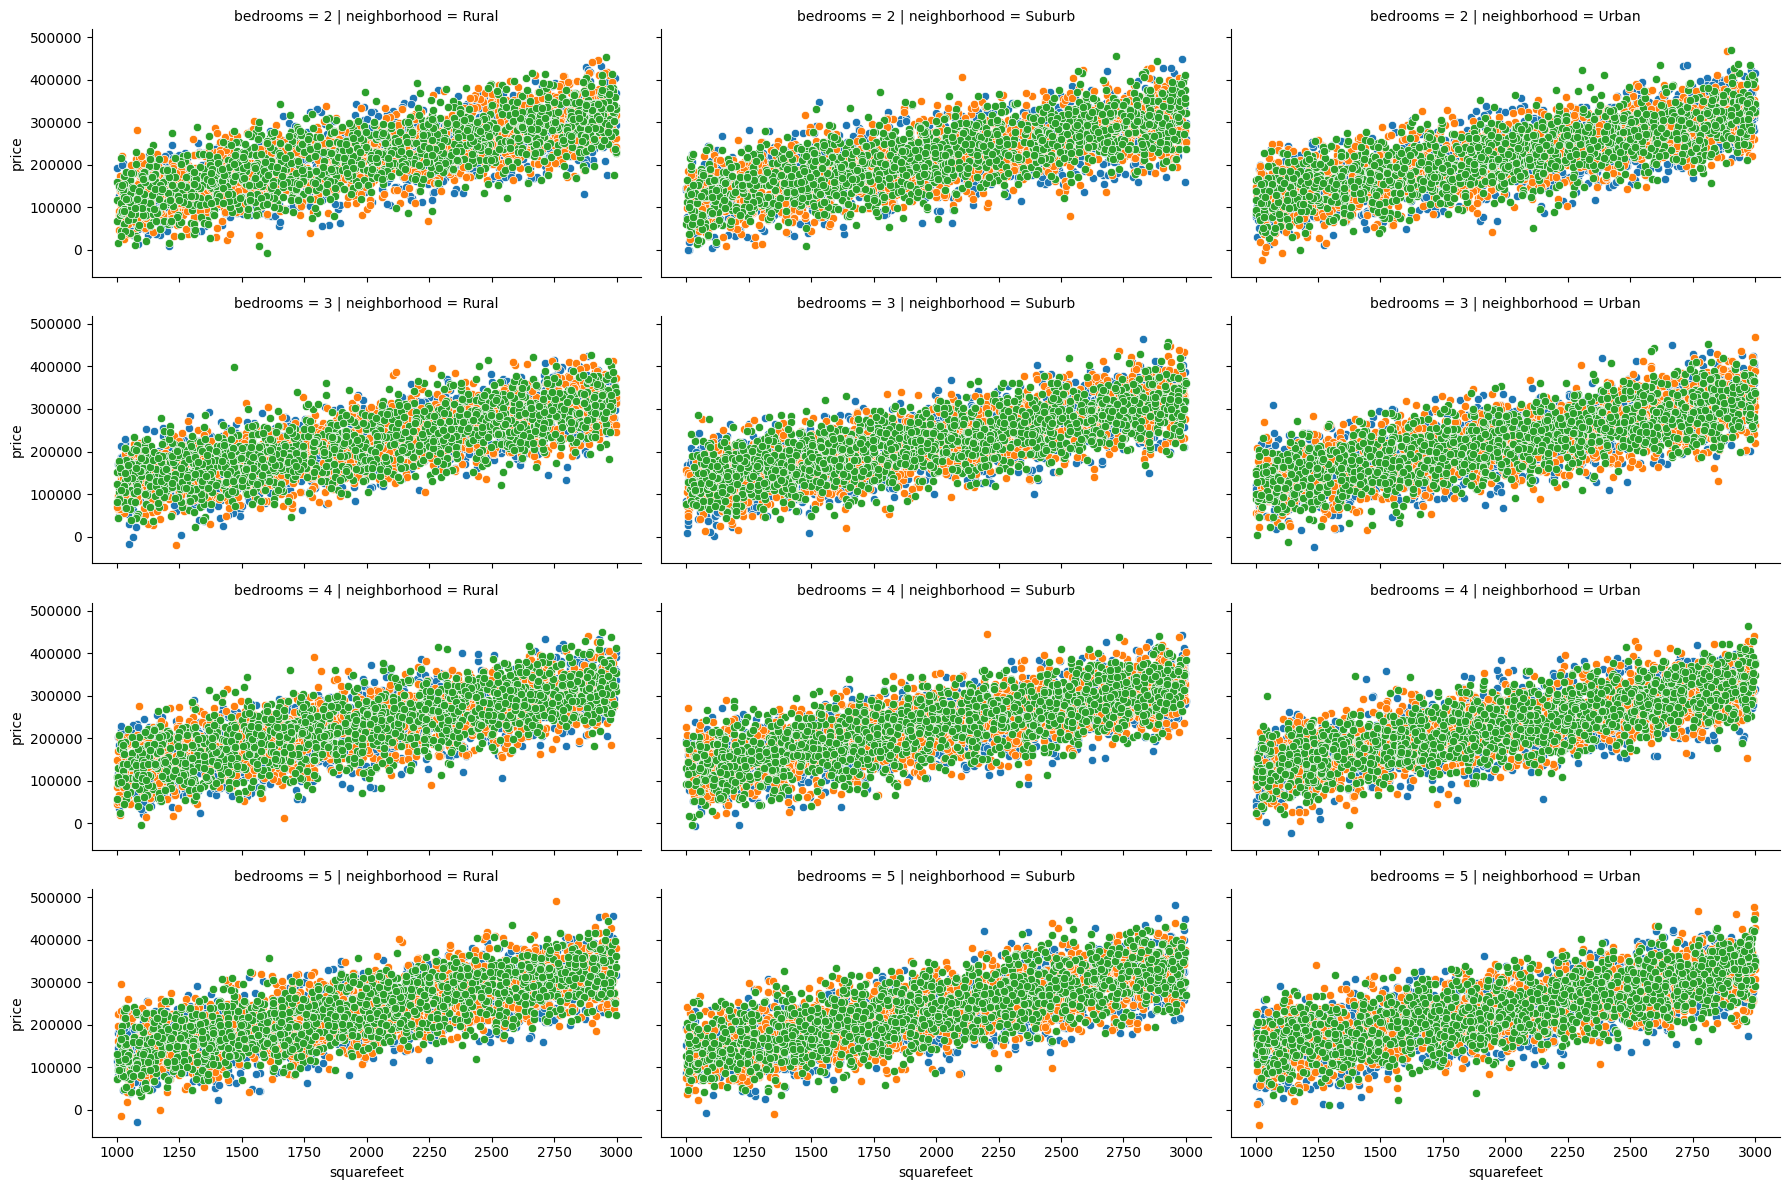

In [10]:
g = sns.FacetGrid(df, col="neighborhood", row="bedrooms" ,hue="bathrooms", height=3, aspect=2)
g.map(sns.scatterplot, "squarefeet", "price")

plt.show()

To validate the assertion that the linear regression is unaffected by the number of bedrooms and neighborhoods, it is crucial to examine the distribution of buildings across each neighborhood. This analysis ensures a comprehensive understanding of potential influences on the observed conclusion.

**1. Price - neighborhood**

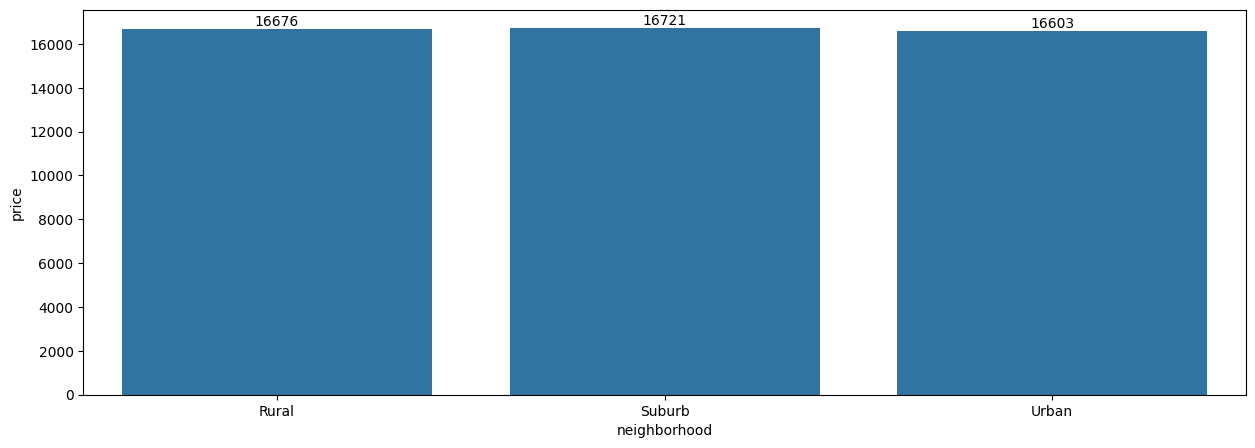

In [18]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(df, x="neighborhood", y="price", estimator="count", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

In [12]:
df.neighborhood.groupby(by=df.neighborhood).count()


neighborhood
Rural     16676
Suburb    16721
Urban     16603
Name: neighborhood, dtype: int64

there is no meaningful difference between number of building for each neighborhoods 

**2. Price - squarefeet**

<Axes: xlabel='squarefeet', ylabel='price'>

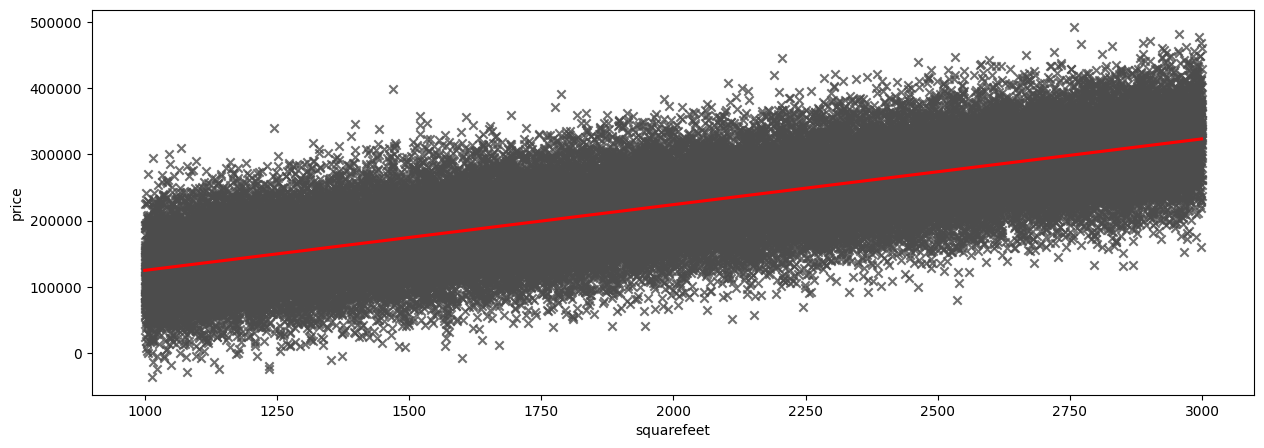

In [19]:
plt.figure(figsize=(15, 5))
sns.regplot(
    data=df, x="squarefeet", y="price",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

### There is no significant relationship between
**yearbuilt and squarefeet**

**price and yearbuilt**

**number of bathrooms/bedrooms and price**
 

 

# Linear regression

We saw this chart previously:

<Axes: xlabel='squarefeet', ylabel='price'>

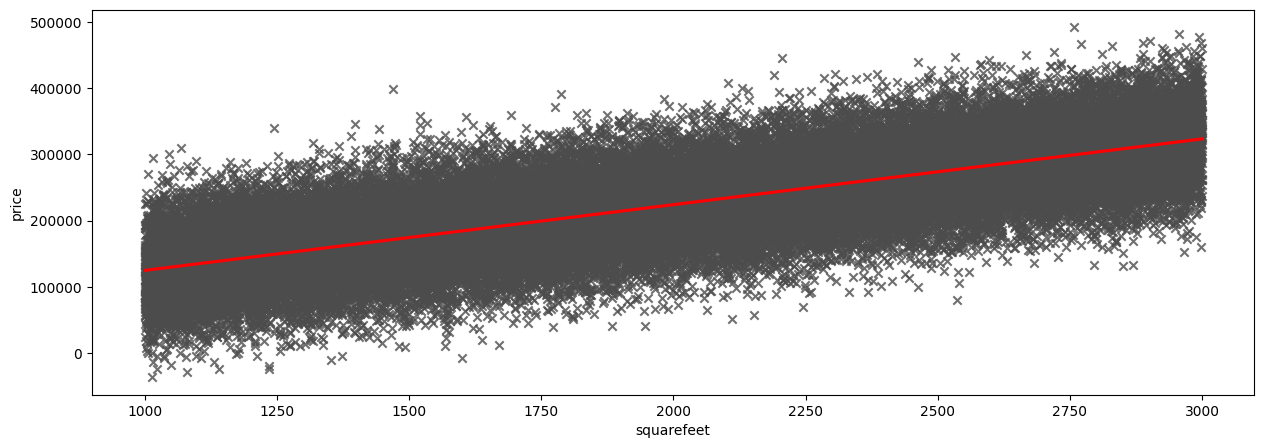

In [20]:
plt.figure(figsize=(15, 5))
sns.regplot(
    data=df, x="squarefeet", y="price",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

Our goal is to fine formula of this linear regression line:

In [15]:
a, b = np.polyfit(x=df["squarefeet"], y=df["price"], deg=1)

In [16]:
# f(x) is equal to 
f"f(x) = {round(a,2)}x + {round(b, 2)}"

'f(x) = 99.32x + 25549.96'

## Our function is 'f(x) = 99.32x + 25549.96'

Utilizing the function F(x), a price recommendation model has been developed. The implementation of this recommendation model is documented in a separate notebook titled 'Recommendation_system.ipynb'."
